<a href="https://colab.research.google.com/github/grace1996-beep/w2_core_grace_ndunda/blob/main/Grace_ndunda_w2_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

defining the question

1) which respondent age is more prone to have/use the bank accounts.

other questions
- which country has the highest people using bank accounts?

- how many households have acccess to bank accounts?
- which gender of respondent is more prone to using bank accounts?
- which age has phone acccess?

Reading the data

In [ ]:
#importing our liblaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#reading provided data
cs=pd.read_csv("http://bit.ly/FinancialDataset")
#checkimg the no of records in data
cs.shape


(23524, 13)

In [ ]:
#previwing top of the dataset
cs.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#previwing bottom of data
cs.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#checking appropriate dtpes
cs.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
#checking for unique values
cs.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

External source validation


i compared my data with data https://data.world/stateofny/banking-institution-history/workspace/file?filename=rows.csv and found out my data was okay to work with. though its not the best data as compared to having a dataset with more numerical values to work with.

Validation


1) tyding upthe dataset

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


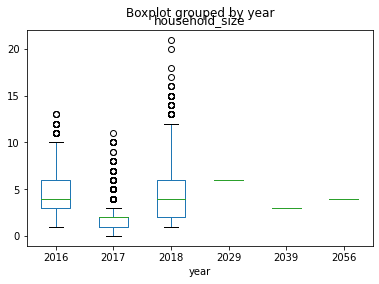

In [ ]:
#identifying outliuers using more than one variable
cs.boxplot(column =['household_size'], by ='year', grid = False)

In [ ]:
Q1 = cs.quantile(0.25)
Q3 = cs.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = cs[~((cs < (Q1 - 1.5 * IQR)) | (cs > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df_out.shape)

(22903, 13)
(22903, 13)


In [ ]:
#dealing with missing data
df_out.isnull().sum()
cs_clean=df_out.dropna()
cs_clean.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
cs_clean.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#dropping duplicates
df_non_duplicates=cs_clean.drop_duplicates()
df_non_duplicates.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


univariate analysis

categorical variables

In [ ]:
#creating a frequency table to show  occurence of each category here am using 'country'
freq_table=df_non_duplicates.groupby(['country']).size().reset_index(name='Count').rename(columns={'Country':'country'})
freq_table

,country,Count
0,Kenya,5868
1,Rwanda,8512
2,Tanzania,6424
3,Uganda,1921


bar chart

In [ ]:
import matplotlib.pyplot as plt



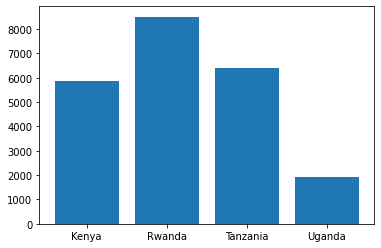

In [ ]:
# bar charts are used to display value associated with categorical data
plt.bar(freq_table['country'],freq_table['Count'])
plt.show()

observations


rwanda appears several time this could show that it has many people who have access to the bank systems

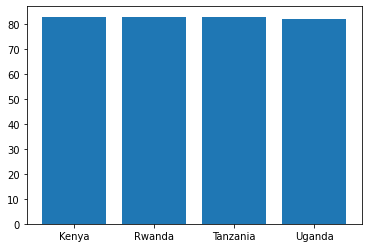

In [ ]:
plt.bar(df_non_duplicates['country'],df_non_duplicates['Respondent Age'])
plt.show()

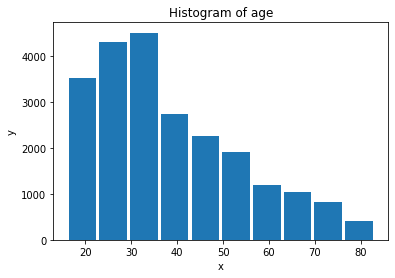

In [ ]:
#histograms show distribution by grouping content
#checking age distribution
population_ages = df_non_duplicates['Respondent Age']
bins            = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

plt.hist(population_ages, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of age') 
plt.show()

observations

people betwen the age of 20 to 50 are more prone to have bank accounts. this is the age that most dominating. the banking sector should focus more on that age.

Measures of central Tendancy

In [ ]:
cs=df_non_duplicates['Respondent Age'].mean()
print(cs)
#median
cl=df_non_duplicates['household_size'].mode()
print(cl)
cm=df_non_duplicates['Respondent Age'].median()
print(cm)


38.34798679867987
0    2.0
dtype: float64
35.0


In [ ]:
#standard deviation
std=df_non_duplicates['Respondent Age'].std()
std

15.806141256107674

In [ ]:
#variance
var=df_non_duplicates['Respondent Age'].var()
var

249.83410140802906

In [ ]:
df_non_duplicates["Respondent Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

In [ ]:
df_non_duplicates["Respondent Age"].skew()
#this is a positively skewed distribution

0.7402138281724044

In [ ]:
#range
max_range = df_non_duplicates["Respondent Age"].max()
min_range= df_non_duplicates["Respondent Age"].min()

# Calculating the range
max_range- min_range

67.0

In [ ]:
df_non_duplicates["Respondent Age"].kurt()
# this is a leptokurtic distribution.

-0.23749387799691757

In [ ]:

df_non_duplicates['Respondent Age'].describe()

count    22725.000000
mean        38.347987
std         15.806141
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: Respondent Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


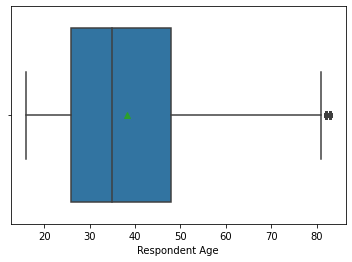

In [ ]:
#boxplot of Respondent Age
sns.boxplot(df_non_duplicates["Respondent Age"], showmeans=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


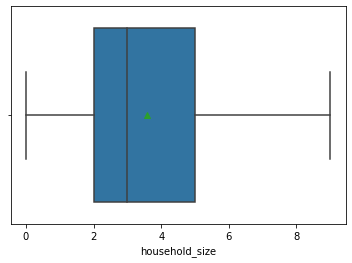

In [ ]:
#box plot of household size
sns.boxplot(df_non_duplicates["household_size"], showmeans=True)

observations

households with 5 or more people should be considered by the banking sectors to imprpove the banking experience. the more people available the more banking accounts registred.

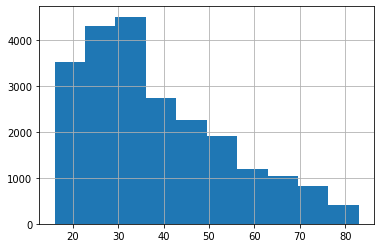

In [ ]:
#creating a histogram
#question
#wgich age is more prone to having bank accounts?
df_non_duplicates['Respondent Age'].hist()

observations


the age of 30 and 35 is moore prone to have more bank accounts because its the age that ohas many people.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


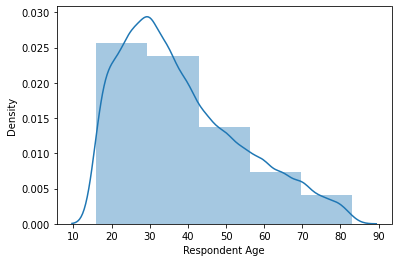

In [ ]:
#plotting histograms
sns.distplot(df_non_duplicates['Respondent Age'],bins=5)

observations

1)Many people age betweeen age 20 and 50 . targetting this age could increase bank transfers.

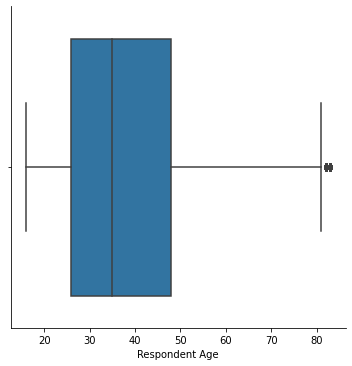

In [ ]:
sns.catplot(x='Respondent Age',kind='box',data=df_non_duplicates)

observations

1)Many people age betweeen age 20 and 50 . targetting this age could increase bank transfers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


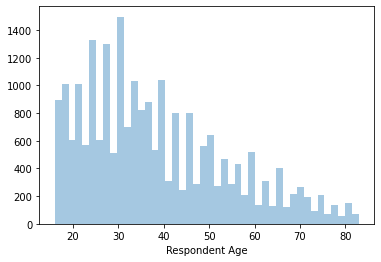

In [ ]:
df = df_non_duplicates[df_non_duplicates.country== 'Kenya']
sns.distplot(df_non_duplicates['Respondent Age'],  kde=False,label='Kenya')

bivariate analysis

Numerical-Numerical Variable Analysis

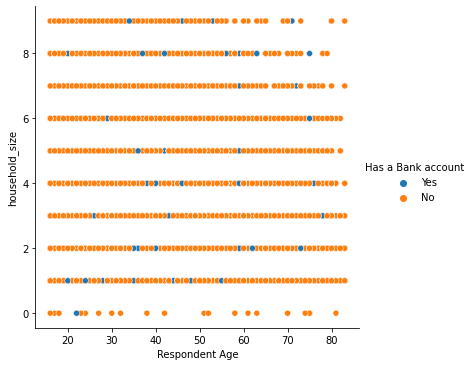

In [ ]:
#this is the analysis betweeen relationshhip between two numerical values.
#scatter plot between two numerical values
sns.relplot(x='Respondent Age',y='household_size',hue='Has a Bank account',data=df_non_duplicates)

observations

1) MOst of the respondent Age do not have bank accounts. this means only few people have registered bank accounts


2) Many households dont have bank accounts too as shown in the scatter plot.

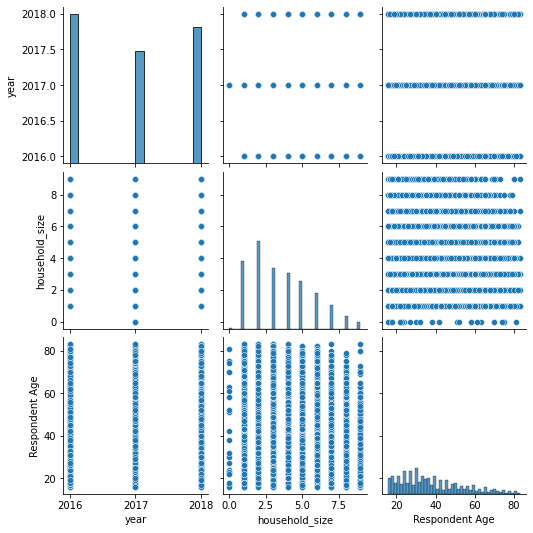

In [ ]:
sns.pairplot(df_non_duplicates)
plt.show()

observations

1)many people are of the age 20 to 40.


2)house hold size is increasing each year

In [ ]:
#correlation
df_non_duplicates.corr()

,year,household_size,Respondent Age
year,1.000000,-0.096684,-0.023538
household_size,-0.096684,1.000000,-0.106209
Respondent Age,-0.023538,-0.106209,1.000000


observations

There is no linear correlation between respondent age and Household_size

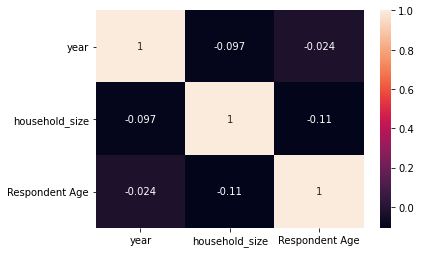

In [ ]:
sns.heatmap(df_non_duplicates.corr(),annot=True)
plt.show()

categorical and numerical analysis

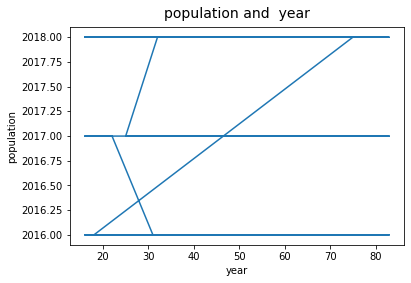

In [ ]:
#household_size vs year
population   = df_non_duplicates['Respondent Age']
year=df_non_duplicates['year']

# Plotting our line graph
plt.plot(population, year)

# Giving a title to our line graph
plt.title("population and  year", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('population')

# Labelling the x-axis
plt.xlabel('year')
plt.show()


multivariate analysis

corelation matrix

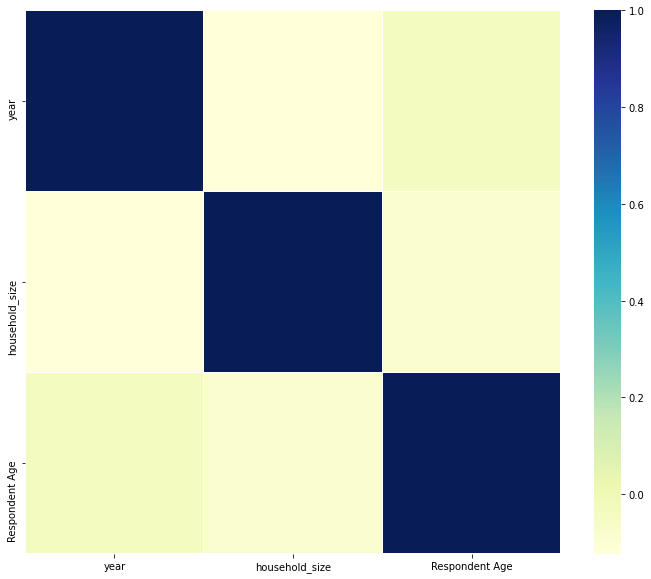

In [ ]:
corrmat = df_non_duplicates.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)




heat map... correlation matrix

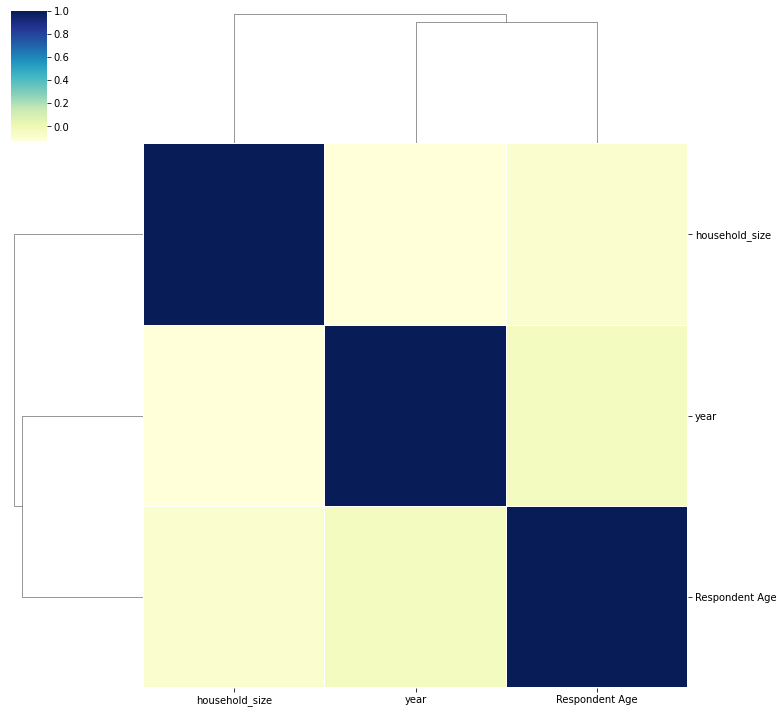

In [ ]:
corrmat = df_non_duplicates.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg



challenging results

the visualizations would be much better if the dataset contained better variables and information.
if for example a population variable was there the visualizations would be much better.